# Project 1 

## Uber New York Data Analysis

In [2]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read CSV
uber_15 = pd.read_csv(r'C:\Users\USER\Python_for_Training\Course005_Real_Project_Analysis_Python\031_Real_Project_Analysis_Python\uber-pickups-in-new-york-city\uber-raw-data-janjune-15.csv',encoding='utf-8')

In [4]:
# Check Head 2 of Data
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65


In [5]:
# Check Dimension of data
uber_15.shape

(14270479, 4)

In [6]:
# check duplicate value

uber_15.duplicated().sum()

898225

In [7]:
# drop duplicate value
uber_15.drop_duplicates(inplace=True)

In [8]:
# check shape of data again
uber_15.shape

(13372254, 4)

In [9]:
# print test
print("Hello John Tik")

Hello John Tik


#### Problem Statement

    1 Which month have max.
      Uber pickups in New York City?
      
    

In [10]:
# checking type of data
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [11]:
# format datetime of 'Pickup_date' and keep to uber_15['Pickup_date']
pd.to_datetime(uber_15['Pickup_date'], format = '%Y-%m-%d %H:%M:%S')

0          2015-05-17 09:47:00
1          2015-05-17 09:47:00
2          2015-05-17 09:47:00
3          2015-05-17 09:47:00
4          2015-05-17 09:47:00
                   ...        
14270474   2015-05-08 15:43:00
14270475   2015-05-08 15:43:00
14270476   2015-05-08 15:43:00
14270477   2015-05-08 15:44:00
14270478   2015-05-08 15:44:00
Name: Pickup_date, Length: 13372254, dtype: datetime64[ns]

In [12]:
# keep to uber_15['Pickup_date']
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'], format = '%Y-%m-%d %H:%M:%S')

In [13]:
# view datadatetime of month in uber_15['Pickup_date']
uber_15['Pickup_date'].dt.month

0           5
1           5
2           5
3           5
4           5
           ..
14270474    5
14270475    5
14270476    5
14270477    5
14270478    5
Name: Pickup_date, Length: 13372254, dtype: int64

In [14]:
# keep to uber_15['Pickup_date'] and create uber_15['month]
uber_15['month'] = uber_15['Pickup_date'].dt.month

In [15]:
# counting month
uber_15['month'].value_counts()

6    2571771
5    2483980
2    2222189
4    2112705
3    2062639
1    1918970
Name: month, dtype: int64

<AxesSubplot: >

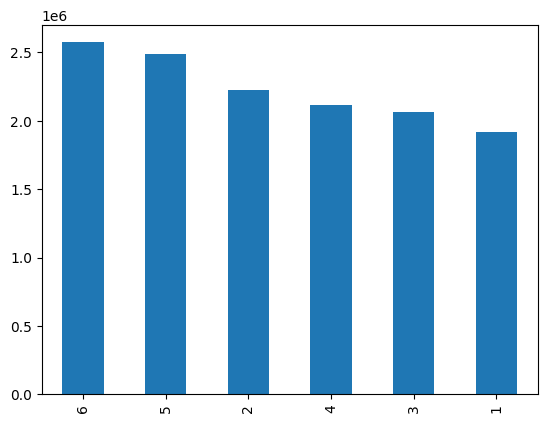

In [16]:
# plot bat chart of uber_15['month']
uber_15['month'].value_counts().plot(kind='bar')

#### Problem Statements

    1. Lets find out Total trips for each month & each month & each weekdays ...

In [17]:
# check weekday
uber_15['Pickup_date'].dt.day_name()

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
             ...  
14270474    Friday
14270475    Friday
14270476    Friday
14270477    Friday
14270478    Friday
Name: Pickup_date, Length: 13372254, dtype: object

In [18]:
uber_15['Pickup_date'].dt.day

0           17
1           17
2           17
3           17
4           17
            ..
14270474     8
14270475     8
14270476     8
14270477     8
14270478     8
Name: Pickup_date, Length: 13372254, dtype: int64

In [19]:
uber_15['Pickup_date'].dt.hour

0            9
1            9
2            9
3            9
4            9
            ..
14270474    15
14270475    15
14270476    15
14270477    15
14270478    15
Name: Pickup_date, Length: 13372254, dtype: int64

In [20]:
uber_15['Pickup_date'].dt.month

0           5
1           5
2           5
3           5
4           5
           ..
14270474    5
14270475    5
14270476    5
14270477    5
14270478    5
Name: Pickup_date, Length: 13372254, dtype: int64

In [21]:
uber_15['Pickup_date'].dt.minute

0           47
1           47
2           47
3           47
4           47
            ..
14270474    43
14270475    43
14270476    43
14270477    44
14270478    44
Name: Pickup_date, Length: 13372254, dtype: int64

In [22]:
# keep to variable
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['month'] = uber_15['Pickup_date'].dt.month
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [23]:
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47


In [24]:
# make group by month and weekdays
uber_15.groupby(['month','weekday'],as_index=False).size()

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319
5,1,Tuesday,196574
6,1,Wednesday,245650
7,2,Friday,373550
8,2,Monday,274948
9,2,Saturday,368311


In [25]:
# check type
type(uber_15.groupby(['month','weekday'],as_index=False).size())

pandas.core.frame.DataFrame

In [26]:
# keep in dataframe is temp
temp = uber_15.groupby(['month','weekday'],as_index=False).size()

In [27]:
# check 
temp.head()

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319


In [28]:
# check unique of month
temp['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [30]:
# create dictionary
dict_month = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June'}

In [32]:
# mapping value to table
temp['month'].map(dict_month)

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
5       Jan
6       Jan
7       Feb
8       Feb
9       Feb
10      Feb
11      Feb
12      Feb
13      Feb
14    March
15    March
16    March
17    March
18    March
19    March
20    March
21    April
22    April
23    April
24    April
25    April
26    April
27    April
28      May
29      May
30      May
31      May
32      May
33      May
34      May
35     June
36     June
37     June
38     June
39     June
40     June
41     June
Name: month, dtype: object

In [33]:
# keep to variable
temp['month'] = temp['month'].map(dict_month)

In [34]:
# check again
temp

,month,weekday,size
0,Jan,Friday,339285
1,Jan,Monday,190606
2,Jan,Saturday,386049
3,Jan,Sunday,230487
4,Jan,Thursday,330319
5,Jan,Tuesday,196574
6,Jan,Wednesday,245650
7,Feb,Friday,373550
8,Feb,Monday,274948
9,Feb,Saturday,368311


<AxesSubplot: xlabel='month', ylabel='size'>

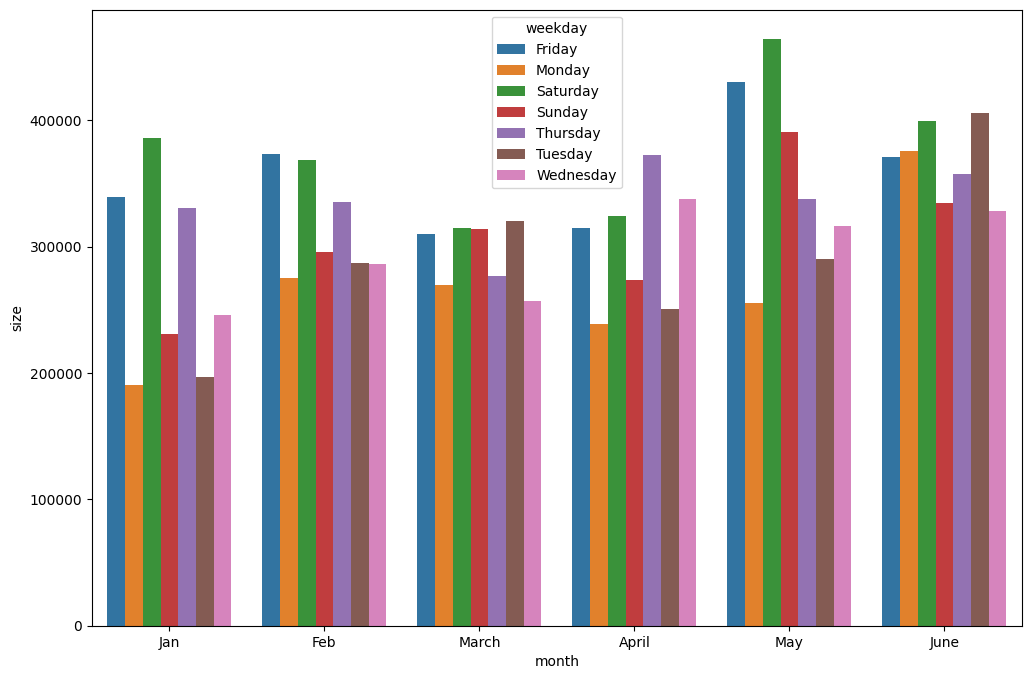

In [36]:
# plot bar chart
plt.figure(figsize=(12,8))
sns.barplot(x = 'month', y = 'size', hue = 'weekday', data = temp)

# Problem Statements

1. Lets find out Hourly Rush in New York City on all days.